# Pilot Project Task1
> 4기 윤다빈

# 1.1 소개
- 데이터셋 : Default of Credit Card Clients <br>
- 출처 : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients <br>
- This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

# 1.2 데이터 불러오기

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

## 추가 변수 정보

- This research employed a binary variable, **default payment (Yes = 1, No = 0), as the response variable.** <br>
- 23개의 설명 변수:
> X1: 주어진 신용 (개인과 가족들의 신용) <br>
X2: 성별 (1 = 남자; 2 = 여자). <br>
X3: 교육 수준 (1 = 대학원; 2 = 대학교; 3 = 고등학교; 4 = 기타). <br>
X4: 혼인 상태 (1 = 기혼; 2 = 미혼; 3 = 기타). <br>
X5: 나이 <br>
**X6 - X11: 과거 구매.(신대만 달러) 2005년 4월부터 9월까지:** <br>
X6 = 2005년 9월 반환 상태; <br>
; . . .; <br>
X11 = 2005년 4월 반환 상태. <br>
( -1 = 정당하게 지불 ; 1 = 한달 간 연체 ; 2 = 2달 간 연체 ; . . .; 8 = 8달 간 연체; 9 = 9달 혹은 그 이상 연체). <br>
**X12-X17: 청구명세서의 금액 (신대만 달러)** <br>
X12 = 2005년 9월 청구명세서의 금액; <br>
; . . .; <br>
X17 = 2005년 4월 청구명세서의 금액. <br>
**X18-X23: 이전 지불 (신대만 달러)** :<br>
X18 = 2005년 9월에 지불된 금액; <br>
; . . .; <br>
X23 = 2005년 4월에 지불된 금액

In [ ]:
import pandas as pd

# y를 Series로 변환 후 이름 붙이기
y_series = y.squeeze()   # DataFrame → Series
y_series.name = "default_payment"

# 합치기
data = pd.concat([X, y_series], axis=1)

# dataframe 완성
print(data.head(10))


       X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X15     X16     X17  \
0   20000   2   2   1  24   2   2  -1  -1   -2  ...       0       0       0   
1  120000   2   2   2  26  -1   2   0   0    0  ...    3272    3455    3261   
2   90000   2   2   2  34   0   0   0   0    0  ...   14331   14948   15549   
3   50000   2   2   1  37   0   0   0   0    0  ...   28314   28959   29547   
4   50000   1   2   1  57  -1   0  -1   0    0  ...   20940   19146   19131   
5   50000   1   1   2  37   0   0   0   0    0  ...   19394   19619   20024   
6  500000   1   1   2  29   0   0   0   0    0  ...  542653  483003  473944   
7  100000   2   2   2  23   0  -1  -1   0    0  ...     221    -159     567   
8  140000   2   3   1  28   0   0   2   0    0  ...   12211   11793    3719   
9   20000   1   3   2  35  -2  -2  -2  -2   -1  ...       0   13007   13912   

     X18    X19    X20    X21    X22    X23  default_payment  
0      0    689      0      0      0      0                1  
1   

# 2.1 기초통계량 확인

In [ ]:
round(data.describe(),2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,default_payment
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [ ]:
data.shape

(30000, 24)

30000행, 24열

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   X1               30000 non-null  int64
 1   X2               30000 non-null  int64
 2   X3               30000 non-null  int64
 3   X4               30000 non-null  int64
 4   X5               30000 non-null  int64
 5   X6               30000 non-null  int64
 6   X7               30000 non-null  int64
 7   X8               30000 non-null  int64
 8   X9               30000 non-null  int64
 9   X10              30000 non-null  int64
 10  X11              30000 non-null  int64
 11  X12              30000 non-null  int64
 12  X13              30000 non-null  int64
 13  X14              30000 non-null  int64
 14  X15              30000 non-null  int64
 15  X16              30000 non-null  int64
 16  X17              30000 non-null  int64
 17  X18              30000 non-null  int64
 18  X19   

모두 숫자형 데이터

In [ ]:
missing = data.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


결측치가 하나도 없음

# 3. 분석 목적
1. 신용 위험 평가
- 어떤 고객이 미래에 신용카드 대금을 연체할 가능성이 높은지 예측 가능

2. 고객 세분화 / 리스크 관리
- 변수를 통해 연체 가능성이 높은 고객군을 찾기

3. 사전 대응 전략 수립
- 연체 가능성이 높은 고객에게
> - 사전 알림서비스 <br>
> - 분할 상환 제안 <br>
> - 이자율 조정

# 4. EDA

## 4.1. 상관관계

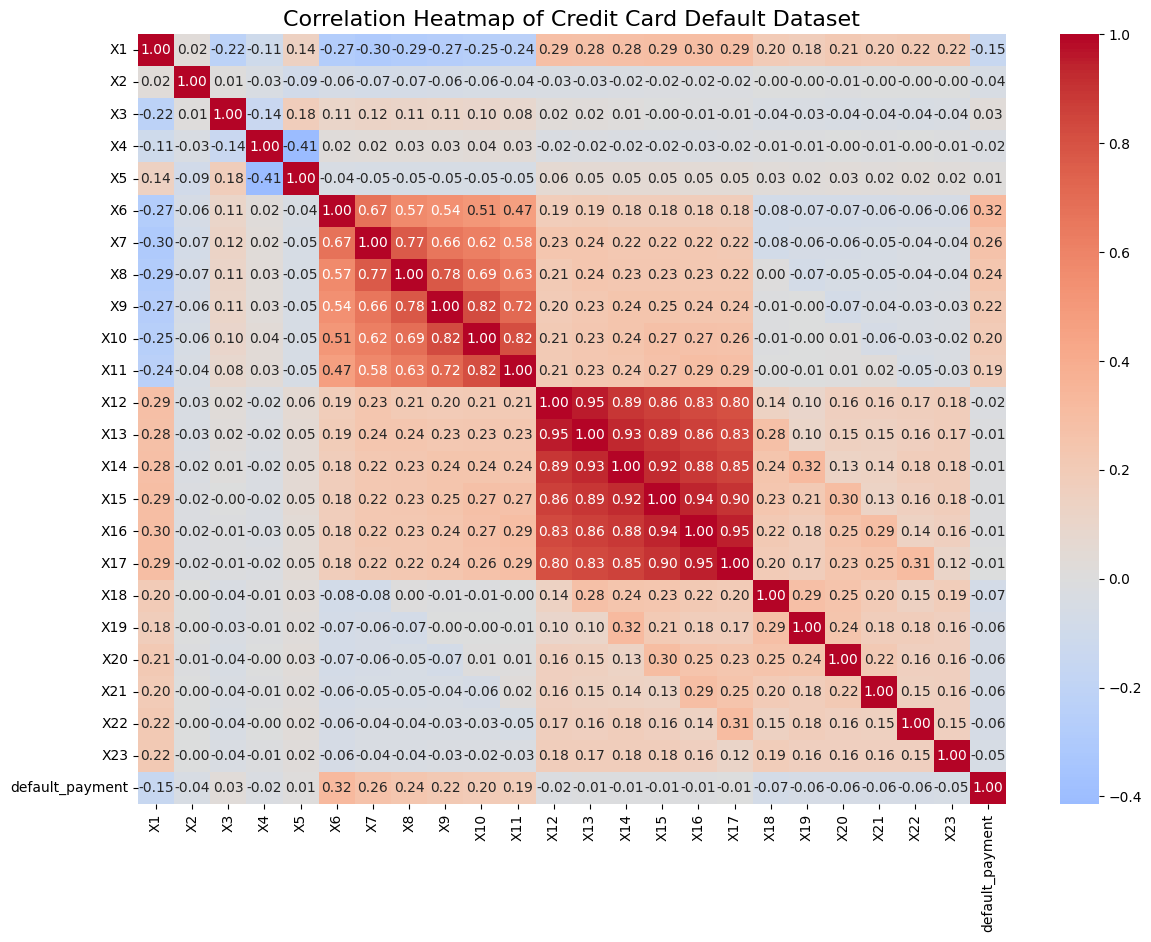

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 상관계수 행렬 계산
corr = data.corr()

# 2. 전체 상관계수 히트맵
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Credit Card Default Dataset", fontsize=16)
plt.show()



## 4.2 박스플랏

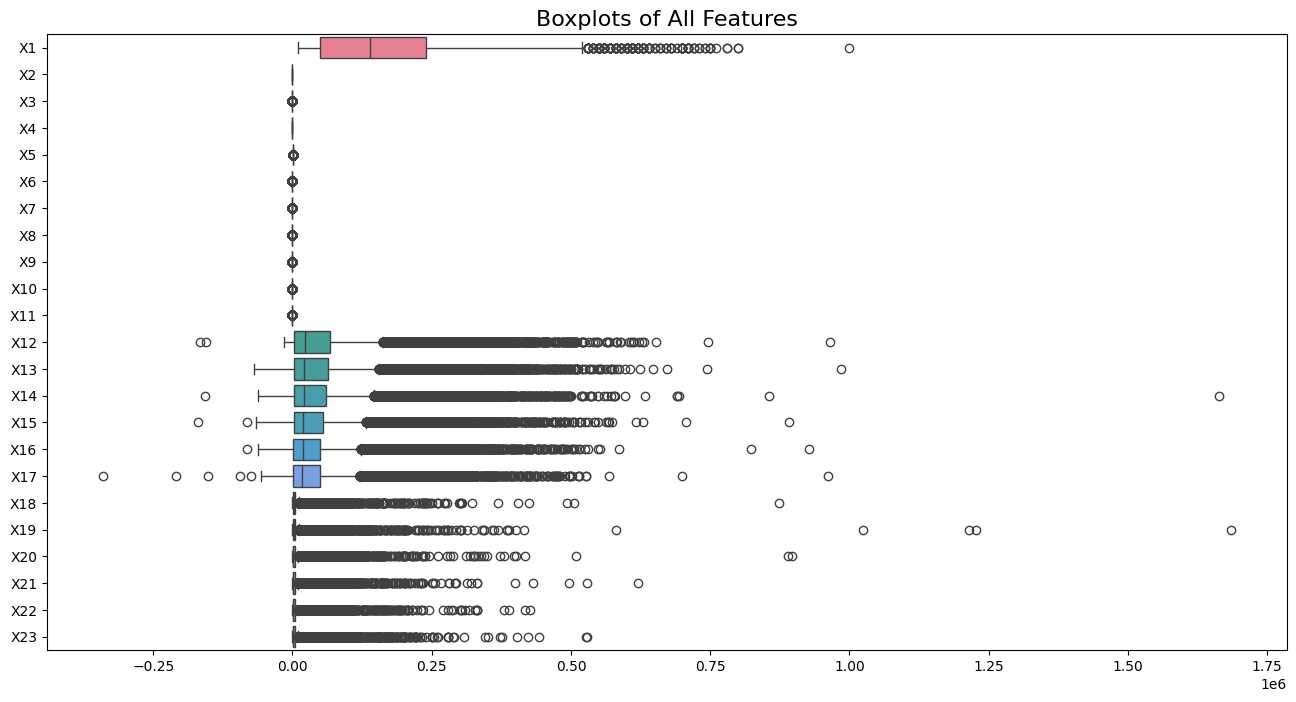

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타깃변수 제외한 설명변수만 선택
feature_cols = [col for col in data.columns if col != "default_payment"]

# 박스플롯 그리기
plt.figure(figsize=(16,8))
sns.boxplot(data=data[feature_cols], orient="h")
plt.title("Boxplots of All Features", fontsize=16)
plt.show()


변수의 성격 (범주형 / 연속형)이 다르기 때문에 설명변수를 쪼개서 시각화할 필요가 있음

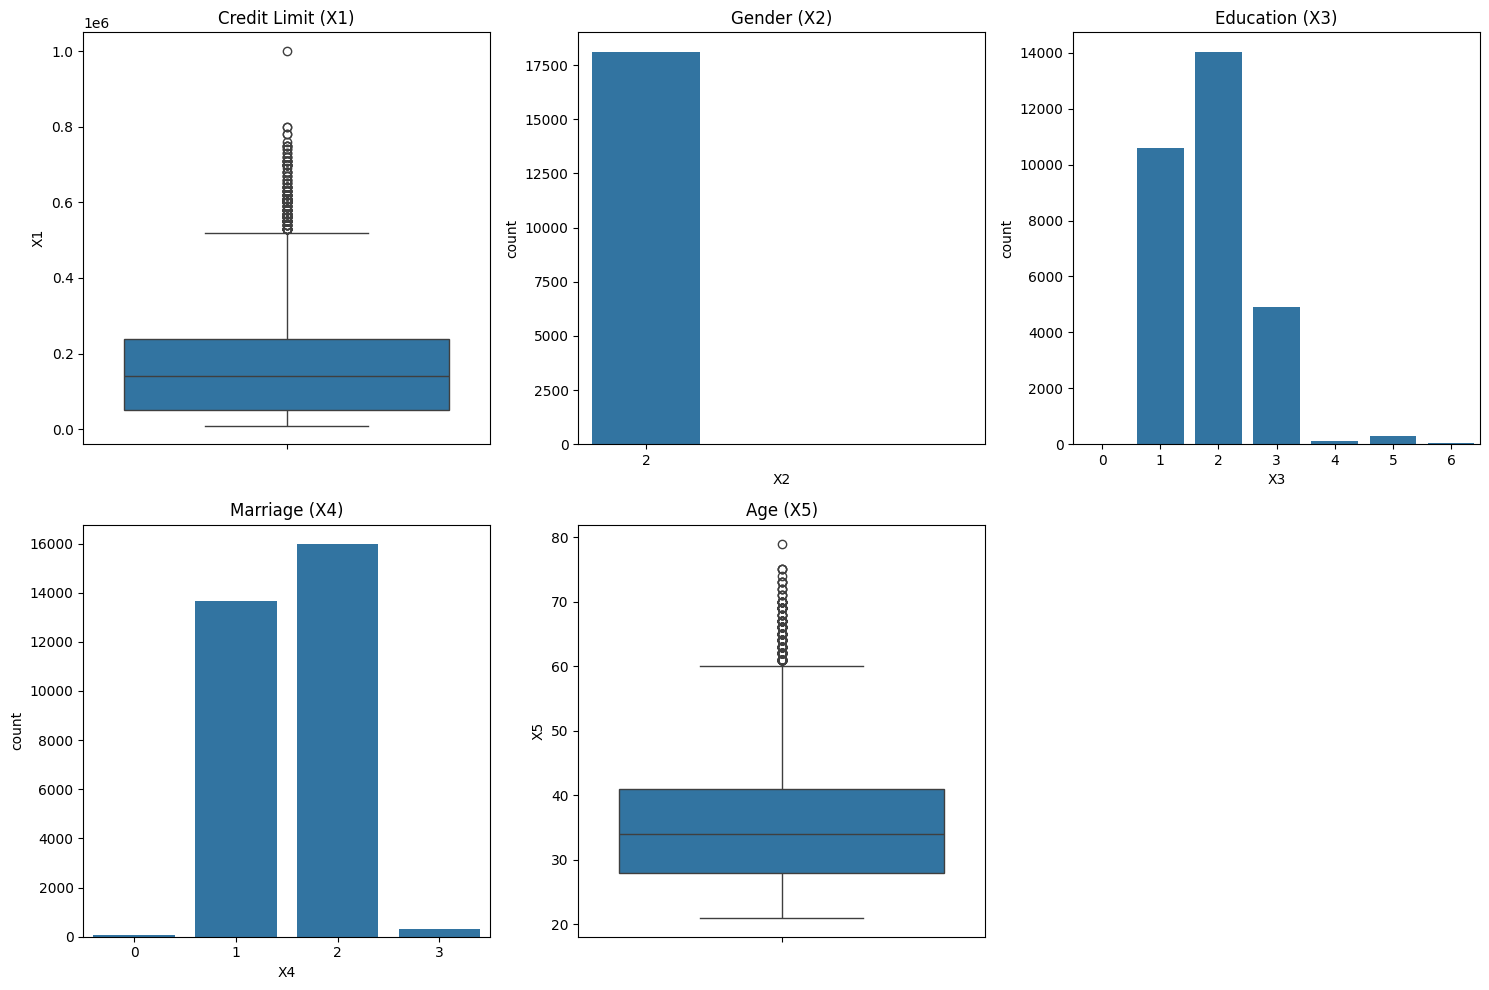

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

# X1 - 신용한도
sns.boxplot(data=data, y="X1", ax=axes[0,0])
axes[0,0].set_title("Credit Limit (X1)")

# X2 - 성별
sns.countplot(data=data, x="X2", ax=axes[0,1])
axes[0,1].set_title("Gender (X2)")
axes[0,1].set_xlim(0, 2.5)

# X3 - 교육수준
sns.countplot(data=data, x="X3", ax=axes[0,2])
axes[0,2].set_title("Education (X3)")
axes[0,1].set_xlim(0.5, 4.5)

# X4 - 결혼여부
sns.countplot(data=data, x="X4", ax=axes[1,0])
axes[1,0].set_title("Marriage (X4)")
axes[0,1].set_xlim(0.5, 3.5)

# X5 - 나이
sns.boxplot(data=data, y="X5", ax=axes[1,1])
axes[1,1].set_title("Age (X5)")

# 빈 자리 없애기
axes[1,2].axis("off")

plt.tight_layout()
plt.show()

*성별이 2에만 몰려서 나오는게 이상하다..*

### 히스토그램으로 데이터 분포 확인

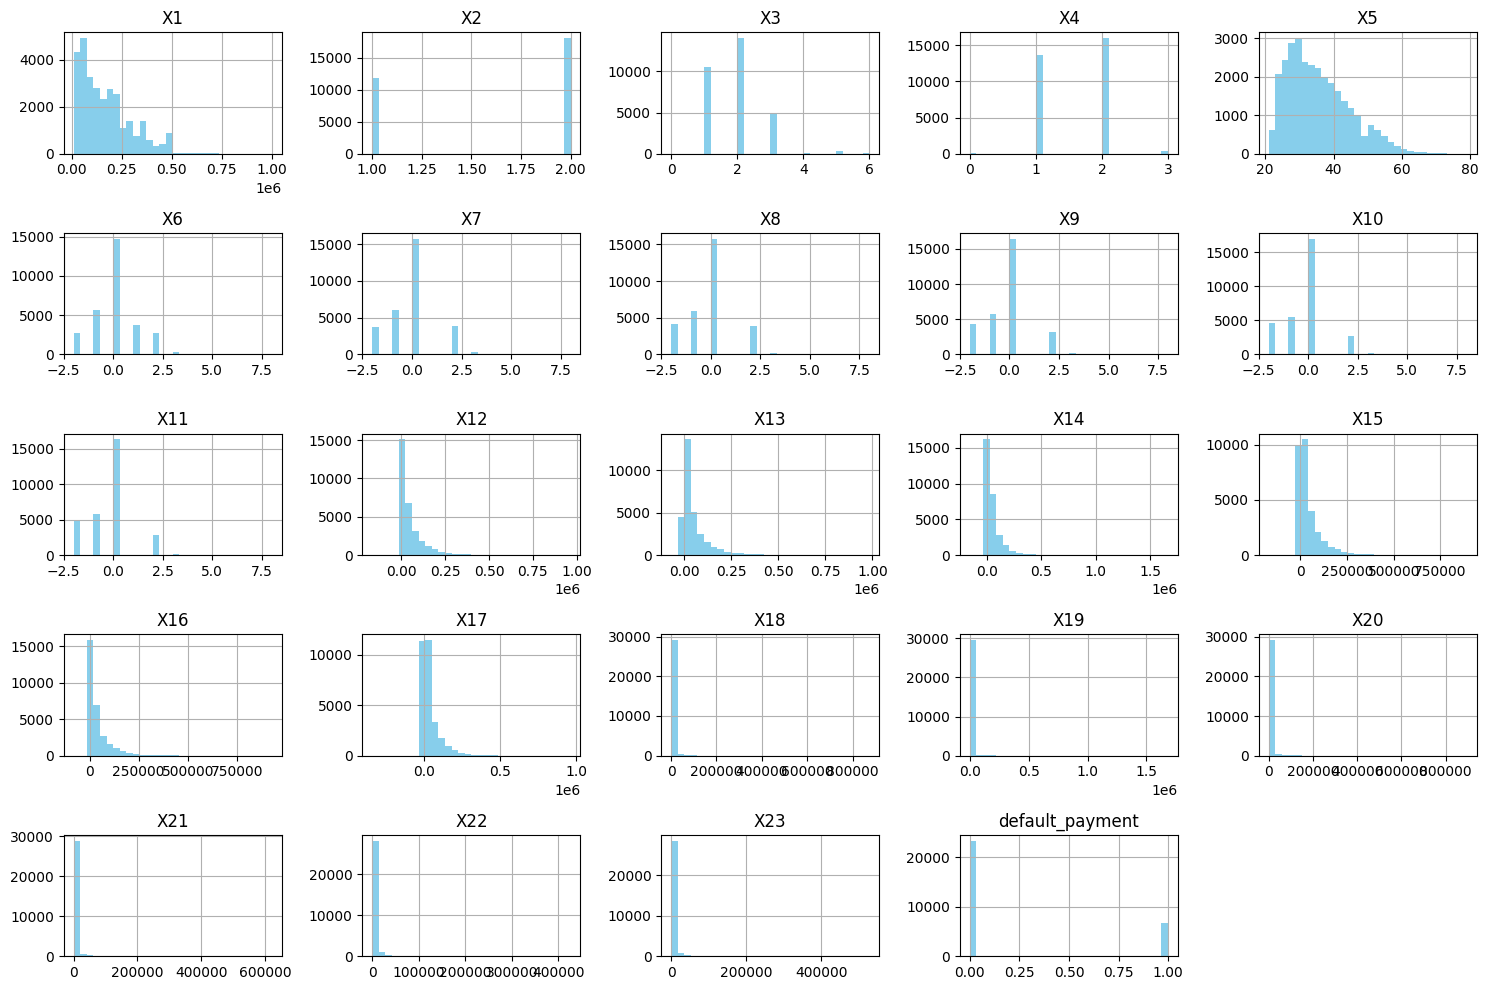

In [ ]:
data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.title('Credit Card Default Histogram')
plt.tight_layout()
plt.show()

- x12 - 16 : 좌측으로 치우친 경향
- 채무불이행자보다 이행자가 더 많음